In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('Indicators.csv')

In [4]:
CR = data[data['CountryName']=='Costa Rica']
#same as CR = data[data['CountryName'].str.contains('Costa Rica')]
CR.tail(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5646448,Costa Rica,CRI,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,151.0
5646449,Costa Rica,CRI,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.0
5646450,Costa Rica,CRI,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,58.0
5646451,Costa Rica,CRI,Urban poverty gap at national poverty lines (%),SI.POV.URGP,2015,7.6
5646452,Costa Rica,CRI,Urban poverty headcount ratio at national pove...,SI.POV.URHC,2015,19.4


In [139]:
#Create pivot table to organize data by indicator and year
pt = CR.pivot_table(values = 'Value', index = ['IndicatorName','Year'], dropna=True)
pt.head(10)

Value
IndicatorName                                      Year           
2005 PPP conversion factor, GDP (LCU per intern... 2005  244.81690
2005 PPP conversion factor, private consumption... 2005  278.96140
ARI treatment (% of children under 5 taken to a... 2011   77.20000
Access to electricity (% of population)            1990   91.32578
                                                   2000   98.00000
                                                   2010   98.00000
                                                   2012   99.50000
Access to electricity, rural (% of rural popula... 1990   89.06011
                                                   2000   92.98065
                                                   2010   97.70000

# Create variables of the different indicators to examine.

In [ ]:
pt.to_csv('pt') 
#did this so I could open it with notepad to easily scroll through the thousands of indicators.
#was trying to view the data using pt.iloc[] and scrolling through it, but it's pretty useless for such a large dataset.

In [206]:

#Health services expenditures
HE_gov = pt.loc['Health expenditure, public (% of government expenditure)']
public_HE = pt.loc['Health expenditure, public (% of GDP)']
private_HE = pt.loc['Health expenditure, private (% of GDP)']
total_HE = pt.loc['Health expenditure, total (% of GDP)']

#Quality of social services
soc_prot = pt.loc["Adequacy of social protection and labor programs (% of total welfare of beneficiary households)"] 
soc_ins = pt.loc['Adequacy of social insurance programs (% of total welfare of beneficiary households)']

In [251]:
#GDP
GDP_dollar = pt.loc['GDP at market prices (current US$)']
GDP_growth = pt.loc['GDP growth (annual %)']
Public_Debt = pt.loc['Debt service on external debt, public and publicly guaranteed (PPG) (TDS, current US$)']


In [252]:
#Government expenses and taxes

Gov_Exp = pt.loc['Expense (% of GDP)']
Gov_Exp2 = pt.loc['Expense (current LCU)']
Tax_Rev = pt.loc['Tax revenue (% of GDP)']
Tax_Rev2 = pt.loc['Tax revenue (current LCU)']
#Exports_tax=pt.loc['Taxes on exports (% of tax revenue)']
#Exports_tax2=pt.loc['Taxes on exports (current LCU)']
#G_S_tax=pt.loc['Taxes on goods and services (% of revenue)']
#G_S_tax2=pt.loc['Taxes on goods and services (current LCU)']
#Inc_tax=pt.loc['Taxes on income, profits and capital gains (% of revenue)']
#Inc_tax2=pt.loc['Taxes on income, profits and capital gains (% of total taxes)']
#Inc_tax2=pt.loc['Taxes on income, profits and capital gains (current LCU)']
#Inter_trade_tax=pt.loc['Taxes on international trade (% of revenue)']
#Inter_trade_tax=pt.loc['Taxes on international trade (current LCU)']

In [11]:
#Total Population:
population = pt.loc['Population, total']


# Examining the decline of social services.

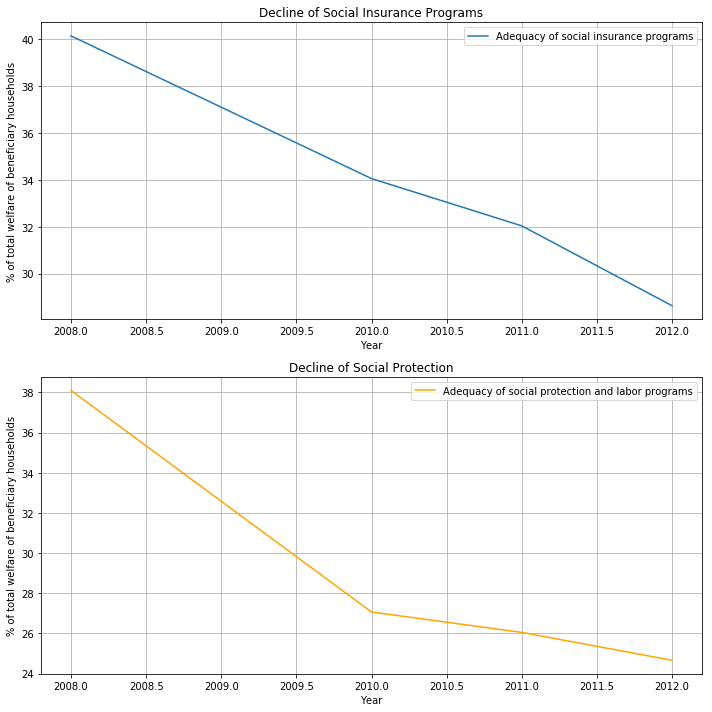

In [278]:
SI = soc_ins.reset_index()  #Did this to drop multilevel indexes created by pivot table.  Use loc(), iloc(), and xs() to index through multilevel indexed tables.
SP = soc_prot.reset_index()

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

ax1.set_title('Decline of Social Insurance Programs')
ax1.plot(SI['Year'],SI['Value'], label = 'Adequacy of social insurance programs')
ax1.set_xlabel('Year')
ax1.set_ylabel('% of total welfare of beneficiary households')
ax1.grid()
ax1.legend()

ax2.set_title('Decline of Social Protection')
ax2.set_xlabel("Year")
ax2.set_ylabel("% of total welfare of beneficiary households")
ax2.grid()
ax2.plot(SP['Year'], SP['Value'], color = 'orange', label = 'Adequacy of social protection and labor programs')
ax2.legend()

fig.tight_layout()
plt.savefig('soc_ins')
plt.show()

# Question1: Is there out of control government spending or a loss of tax revenue that would result in spending cuts to healthcare? 


In [254]:
#need to scale values in order to make comparisons.

from sklearn import preprocessing

Pop = population.reset_index()
scaler = preprocessing.MinMaxScaler()
scaled_Pop = scaler.fit_transform(Pop)
scaled_Pop = pd.DataFrame(scaled_Pop, columns=['Year','Value'])

GDP = GDP_dollar.reset_index()
scaled_GDP = scaler.fit_transform(GDP)
scaled_GDP = pd.DataFrame(scaled_GDP, columns=['Year', 'Value'])

PD = Public_Debt.reset_index()
scaled_PD = scaler.fit_transform(PD)
scaled_PD = pd.DataFrame(scaled_PD, columns=['Year', 'Value'])


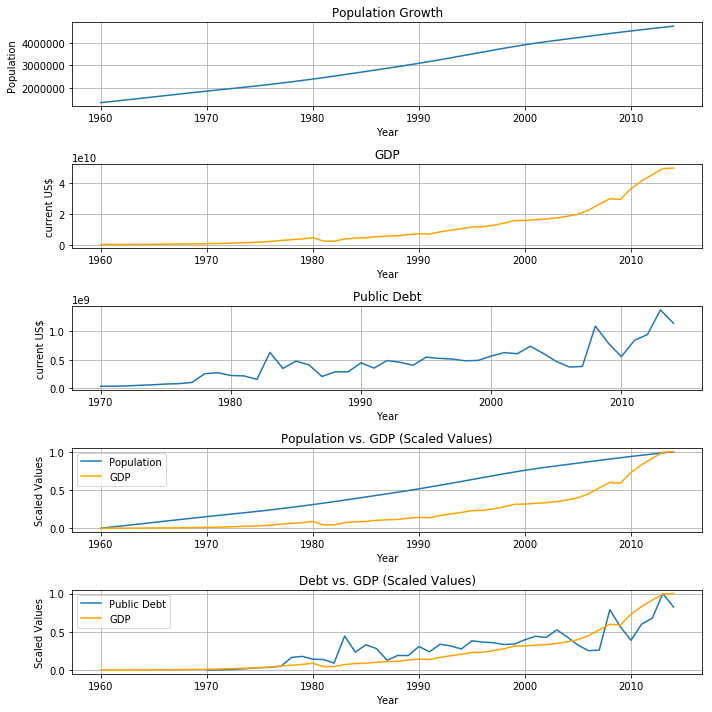

In [256]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,10))
ax1.set_title('Population Growth')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population")
ax1.grid()
ax1.plot(Pop['Year'],Pop['Value'])

ax2.set_title('GDP')
ax2.set_xlabel("Year")
ax2.set_ylabel("current US$")
ax2.grid()
ax2.plot(GDP['Year'],GDP['Value'], color = 'orange')

ax3.set_title('Public Debt')
ax3.set_xlabel('Year')
ax3.set_ylabel('current US$')
ax3.grid()
ax3.plot(PD['Year'],PD['Value'])

ax4.set_title('Population vs. GDP (Scaled Values)')
ax4.set_xlabel("Year")
ax4.set_ylabel('Scaled Values')
ax4.grid()
ax4.plot(Pop['Year'], scaled_Pop['Value'], label='Population')
ax4.plot(GDP['Year'], scaled_GDP['Value'], color = 'orange', label='GDP')
ax4.legend()

ax5.set_title('Debt vs. GDP (Scaled Values)')
ax5.set_xlabel('Year')
ax5.set_ylabel('Scaled Values')
ax5.grid()
ax5.plot(PD['Year'],scaled_PD['Value'], label='Public Debt')
ax5.plot(GDP['Year'],scaled_GDP['Value'], color='orange', label='GDP')
ax5.legend()

fig.tight_layout()
plt.savefig('explr_of_factors')
plt.show()

In [277]:
GDPvsPop = np.corrcoef(GDP['Value'],Pop['Value'])
GDPvsPop

array([[ 1.        ,  0.87889878],
       [ 0.87889878,  1.        ]])

In [238]:
GDP.shape

(55, 2)

In [239]:
PD.shape

(45, 2)

In [245]:
GDP.head(12)

,Year,Value
0,1960,2.860500e+09
1,1961,2.929301e+09
2,1962,3.186600e+09
3,1963,3.404200e+09
4,1964,3.608200e+09
5,1965,3.928500e+09
6,1966,4.288400e+09
7,1967,4.633900e+09
8,1968,5.126700e+09
9,1969,5.655300e+09


In [258]:
GDPvsPD = np.corrcoef(GDP['Value'][10:],PD['Value'])
GDPvsPD

array([[ 1.        ,  0.86330732],
       [ 0.86330732,  1.        ]])

In [ ]:
#What does Government Expenses vs. Tax Revenue look like?  Has there been any large tax cuts or drastic rises in spending?

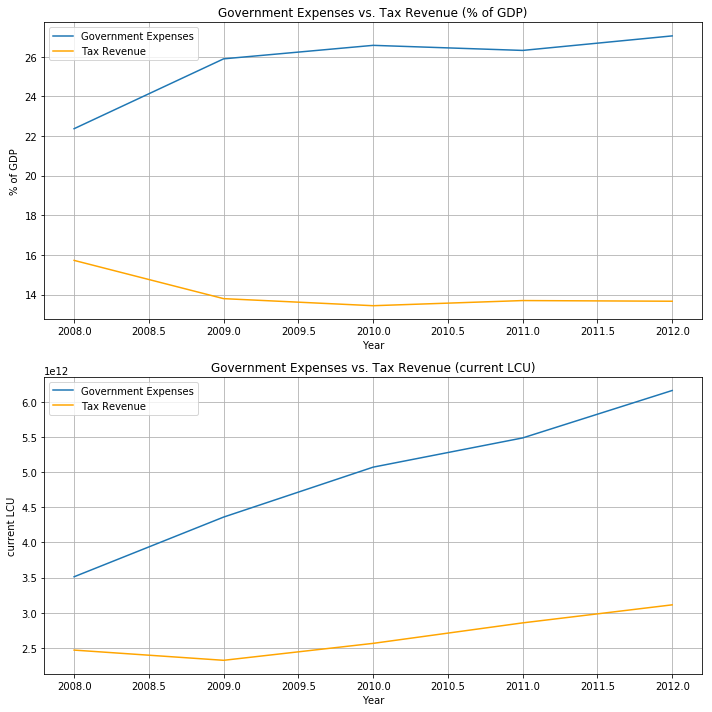

In [259]:
GE = Gov_Exp.reset_index()
TR = Tax_Rev.reset_index()
GE2 = Gov_Exp2.reset_index()
TR2 = Tax_Rev2.reset_index()

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))
ax1.set_title('Government Expenses vs. Tax Revenue (% of GDP)')
ax1.set_xlabel("Year")
ax1.set_ylabel("% of GDP")
ax1.grid()
ax1.plot(GE['Year'],GE['Value'], label='Government Expenses')
ax1.plot(TR['Year'],TR['Value'], color = 'orange', label='Tax Revenue')
ax1.legend()

ax2.set_title('Government Expenses vs. Tax Revenue (current LCU)')
ax2.set_xlabel("Year")
ax2.set_ylabel("current LCU")
ax2.grid()
ax2.plot(GE2['Year'],GE2['Value'], label='Government Expenses')
ax2.plot(TR2['Year'],TR2['Value'], color = 'orange', label='Tax Revenue')
ax2.legend()

fig.tight_layout()

plt.savefig('Govn_Exp_vs_Tax_Rev')
plt.show()

In [248]:
#Change in spending from 2008 to 2012.
GE2['Value'][4] - GE2['Value'][0]

2650293589187.79

In [250]:
TR2['Value'][4] - TR2['Value'][0]

643850073376.72998

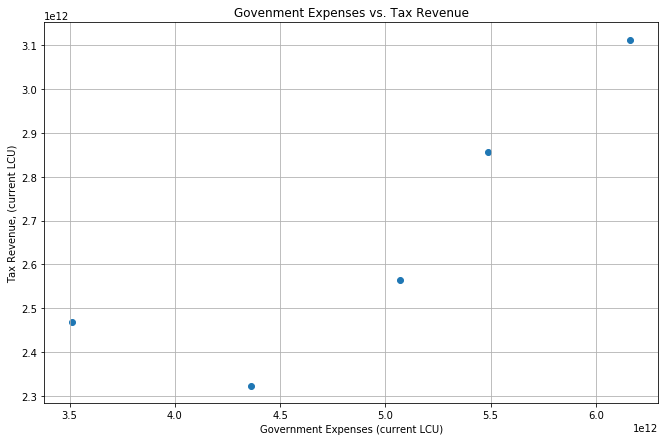

In [264]:
#Created a scatter plot of the two. Nothing too insightful. 

GE2 = Gov_Exp2.reset_index()
TR2 = Tax_Rev2.reset_index()

fig, (ax1) = plt.subplots(1, figsize=(11,7))
ax1.set_title('Govenment Expenses vs. Tax Revenue')
ax1.set_xlabel("Government Expenses (current LCU)")
ax1.set_ylabel("Tax Revenue, (current LCU)")
ax1.grid()
ax1.scatter(GE2['Value'], TR2['Value'])


#fig.tight_layout()
plt.show()

In [138]:
ExpvsRev = np.corrcoef(GE2['Value'],TR2['Value'])
ExpvsRev

array([[ 1.        ,  0.86078094],
       [ 0.86078094,  1.        ]])

In [ ]:
#Government expenses follows revenue. 
#However, the increase in government spending has risen over time much faster than tax revenue.

In [ ]:
#Is government healthcare spending keeping up with population growth (population growth as possible factor)? 

In [ ]:
HE_gov = pt.loc['Health expenditure, public (% of government expenditure)']
public_HE = pt.loc['Health expenditure, public (% of GDP)']
private_HE = pt.loc['Health expenditure, private (% of GDP)']
total_HE 

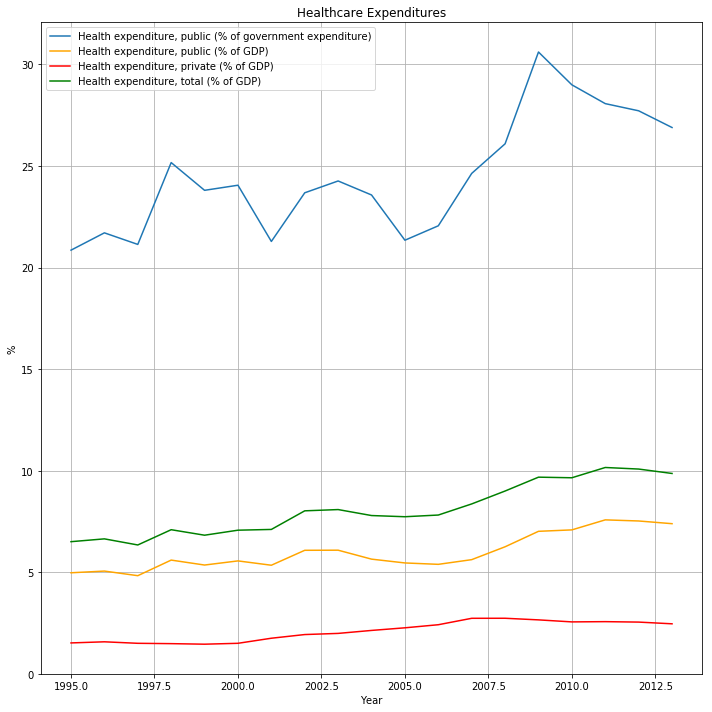

In [226]:
HE_gov2 = HE_gov.reset_index()
public_HE2 = public_HE.reset_index()
private_HE2 = private_HE.reset_index()
total_HE2 = total_HE.reset_index()

fig, (ax1) = plt.subplots(1, figsize=(10,10))
ax1.set_title('Healthcare Expenditures')
ax1.set_xlabel("Year")
ax1.set_ylabel("%")
ax1.grid()
ax1.plot(HE_gov2['Year'],HE_gov2['Value'], label='Health expenditure, public (% of government expenditure)')
ax1.plot(public_HE2['Year'],public_HE2['Value'], color = 'orange', label='Health expenditure, public (% of GDP)')
ax1.plot(private_HE2['Year'],private_HE2['Value'], color = 'red', label ='Health expenditure, private (% of GDP)')
ax1.plot(total_HE2['Year'],total_HE2['Value'], color= 'green', label='Health expenditure, total (% of GDP)')
ax1.legend()

fig.tight_layout()
fig.savefig('Healthcare_expenditures')
plt.show()

In [ ]:
#What factor(s) caused the drastic rise in healthcare costs around 2007?
#Is this a reason why services have been declining?
#Is population growth a possible factor?

In [180]:
scaled_HE_gov2 = scaler.fit_transform(HE_gov2)
scaled_HE_gov2 = pd.DataFrame(scaled_HE_gov2, columns=['Year', 'Value'])

scaled_public_HE2 = scaler.fit_transform(public_HE2)
scaled_public_HE2 = pd.DataFrame(scaled_public_HE2, columns=['Year', 'Value'])

scaled_private_HE2 = scaler.fit_transform(private_HE2)
scaled_private_HE2 = pd.DataFrame(scaled_private_HE2, columns=['Year', 'Value'])

scaled_total_HE2 = scaler.fit_transform(total_HE2)
scaled_total_HE2 = pd.DataFrame(scaled_total_HE2, columns=['Year', 'Value'])


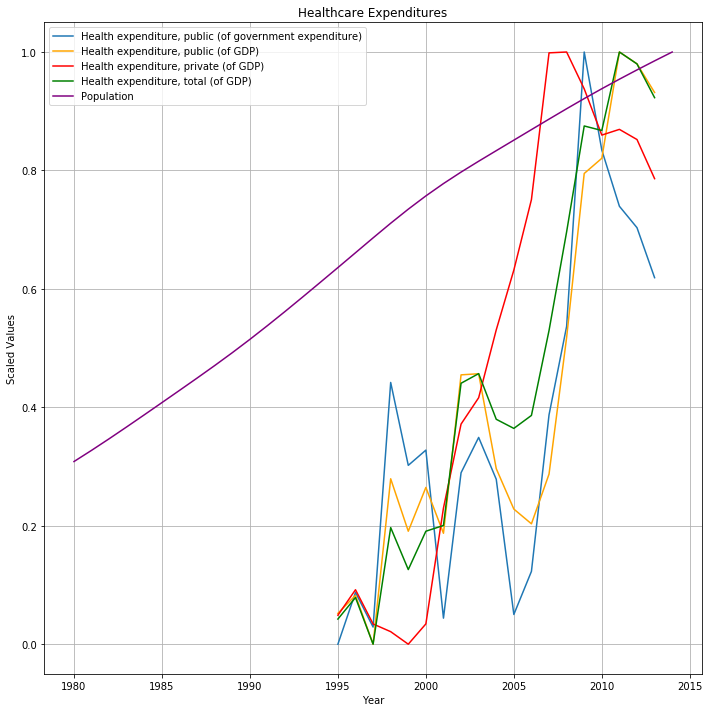

In [227]:
fig, (ax1) = plt.subplots(1, figsize=(10,10))
ax1.set_title('Healthcare Expenditures')
ax1.set_xlabel("Year")
ax1.set_ylabel("Scaled Values")
ax1.grid()
ax1.plot(HE_gov2['Year'],scaled_HE_gov2['Value'], label='Health expenditure, public (of government expenditure)')
ax1.plot(public_HE2['Year'],scaled_public_HE2['Value'], color = 'orange', label='Health expenditure, public (of GDP)')
ax1.plot(private_HE2['Year'],scaled_private_HE2['Value'], color = 'red', label ='Health expenditure, private (of GDP)')
ax1.plot(total_HE2['Year'],scaled_total_HE2['Value'], color= 'green', label='Health expenditure, total (of GDP)')
ax1.plot(Pop['Year'][20:], scaled_Pop['Value'][20:], color='purple', label='Population')
ax1.legend()

fig.tight_layout()
fig.savefig('Health_exp_vs_pop')
plt.show()

In [ ]:
#between 2006-2009 healthcare expenditures rose quickly although the rate of population growth was slowing. 


In [267]:
HE_gov2.shape

(19, 2)

In [276]:
Pop.shape

(55, 2)

In [274]:
np.corrcoef(HE_gov2['Value'],Pop['Value'][36:])

array([[ 1.        ,  0.74308838],
       [ 0.74308838,  1.        ]])